In [72]:
%matplotlib inline
import random
import torch
import pickle
from attention_util import *
import torch.nn.functional as F

In [84]:
#######################################################################
#
# Visualization for SST dataset
#
#######################################################################
# load the transformer attention to memory for all samples
id_tf_attns = pickle.load( open("../nlap/id_tf_attns_sst.p", "rb" ) )
id_ctx_attns = pickle.load( open("../nlap/id_ctx_attns_sst.p", "rb" ) )
data_folder = "../../../Stanford-Sentiment-Treebank/"
all_sentence = pickle.load( open( data_folder + "id_sentence.p", "rb" ) )
id_labels = pickle.load( open( "../nlap/id_labels_test_sst.p", "rb" ) )

In [85]:
# get sentences with length = 10 (this is easier to make good visualizations)
sentence_in_10 = []
for seq in id_tf_attns.keys():
    tf_attns = torch.FloatTensor(id_tf_attns[seq])
    sentence = all_sentence[seq]
    # input params
    tokens = tf_attns.shape[2]
    # let us skip visualization long sequence
    if tokens == 10:
        sentence_in_10.append(seq)

In [100]:
#######################################################################
#
# Rerun this block to randomly select an example to visualize
#
#######################################################################
seq_rand = random.choice(sentence_in_10)
sentence = all_sentence[seq_rand]
print("Visualizing this sentence #" + str(seq_rand) + " :")
print(sentence)
tf_attns = torch.FloatTensor(id_tf_attns[seq_rand])
ctx_attns = torch.FloatTensor(id_ctx_attns[seq_rand])
labels = id_labels[seq_rand]
print("True Label: " + labels[0].strip("$") + "; Predicted Label: " + labels[1].strip("$") )

Visualizing this sentence #489 :
['an', 'impressive', 'if', 'flawed', 'effort', 'that', 'indicates', 'real', 'talent', '.']
True Label: +; Predicted Label: +


<IPython.core.display.Javascript object>


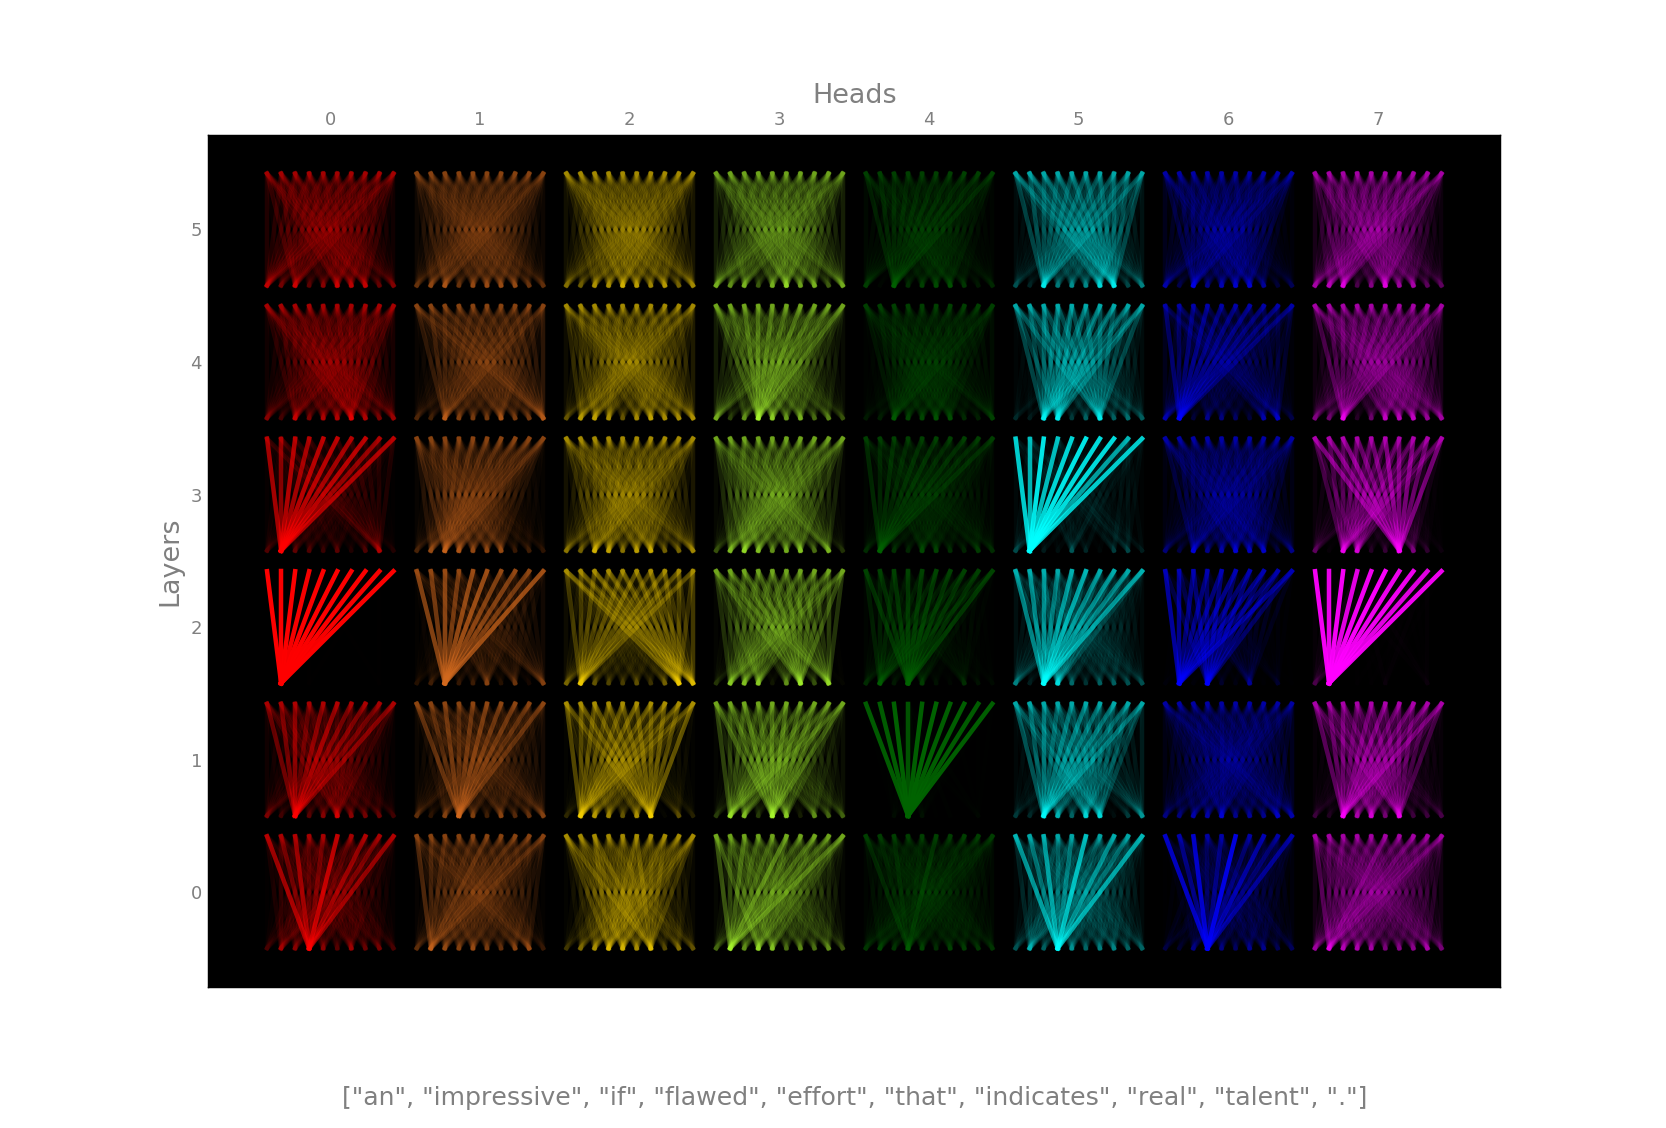

In [101]:
'''
This is the visualization for attentions on each heads on each layer separately.
'''
%matplotlib notebook
head_attn_viz_func(tf_attns, sentence, seq_rand)

Raw attention score:
tensor([0.4422, 1.0257, 0.7158, 2.1202, 0.8225, 0.5372, 0.7545, 0.5731, 0.5894,
        0.4195])


<IPython.core.display.Javascript object>


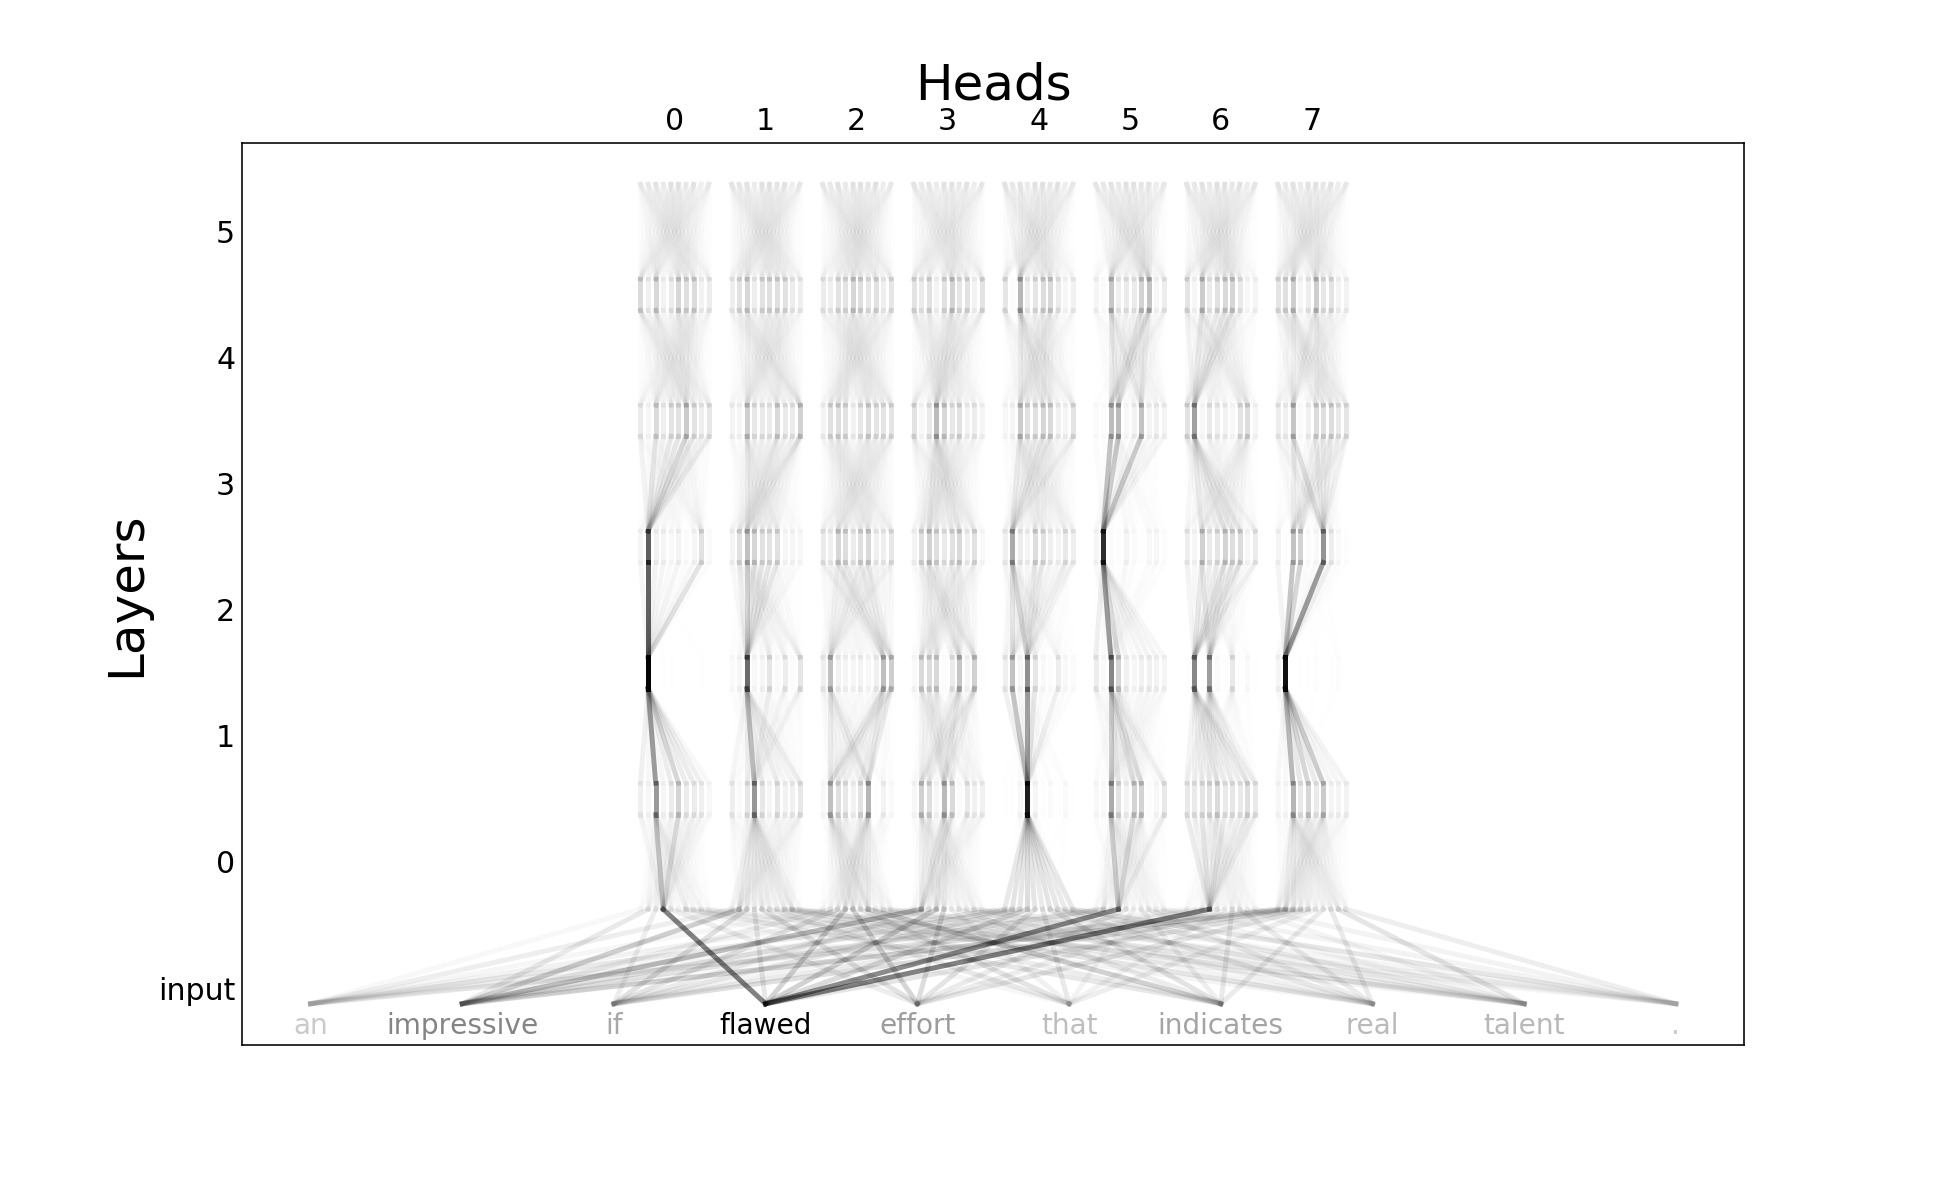

In [104]:
'''
This is the visualization for accumulative attentions.
'''
%matplotlib notebook
trace_attn_viz_func(tf_attns, ctx_attns, sentence, seq_rand, reduce="min_max", view="small", save_fig=False)

Raw attention score:
tensor([0.4702, 1.1277, 0.6272, 0.5221, 0.7304, 0.4152, 1.2147, 0.4038, 2.0268,
        0.4617])


<IPython.core.display.Javascript object>


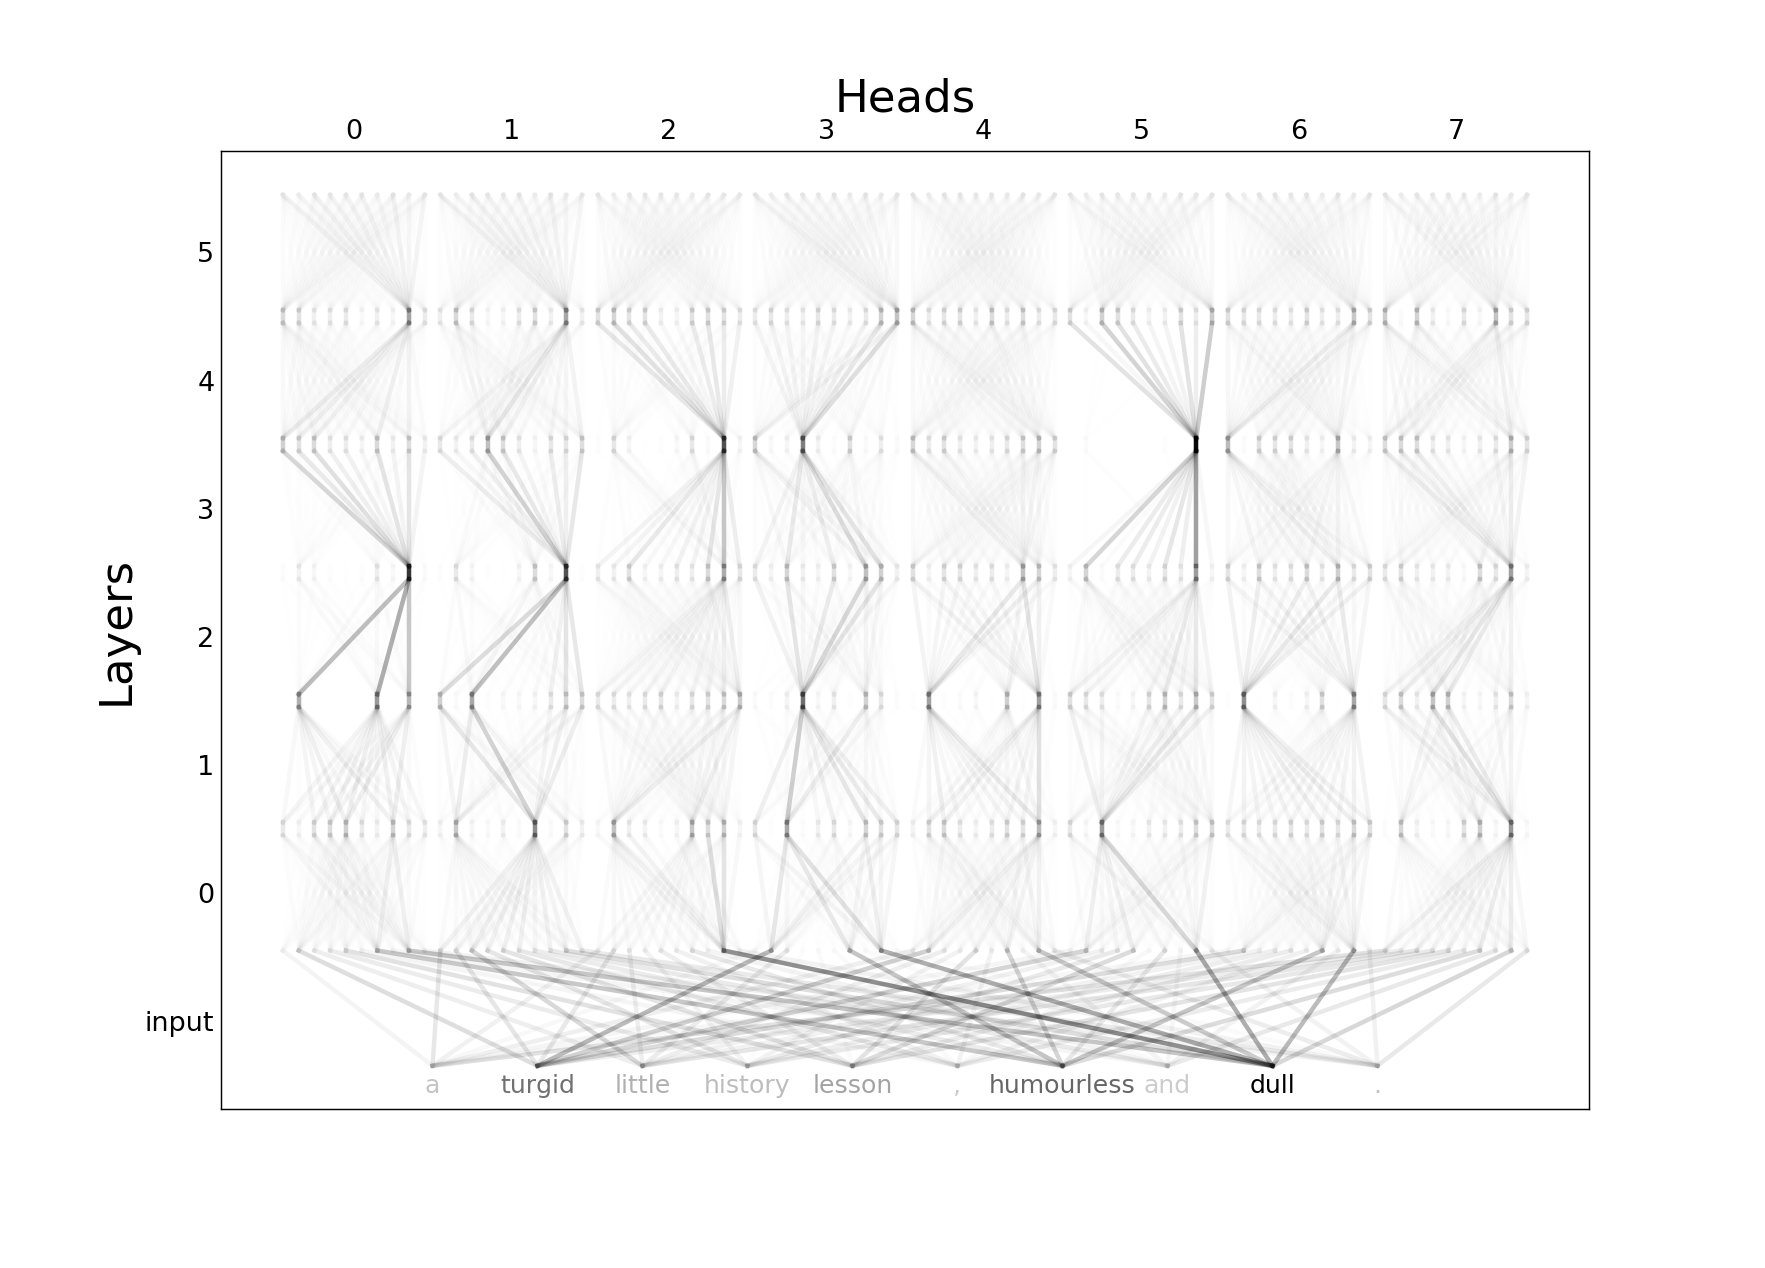

In [30]:
'''
Try in the zoom-in version
'''
%matplotlib notebook
trace_attn_viz_func(tf_attns, ctx_attns, sentence, seq_rand, reduce="min_max", view="normal")

In [31]:
#######################################################################
#
# Visualization for SEND dataset
#
#######################################################################
# load the transformer attention to memory for all samples
seq_label = pickle.load( open("../nlap/seq_labels_test_send.p", "rb") )
seq_sentence = pickle.load( open("../nlap/seq_sentences_test_send.p", "rb") )
seq_tf_attns = pickle.load( open("../nlap/seq_tf_attns_test_send.p", "rb") )
seq_ctx_attns = pickle.load( open("../nlap/seq_ctx_attns_test_send.p", "rb") )
seq_ccc = pickle.load( open("../nlap/seq_ccc_test_send.p", "rb") )

In [113]:
#######################################################################
#
# Rerun this block to randomly select an example to visualize
#
#######################################################################
ENFORECE_POSTIVE = False # False meaning to look at only positive cases

seqs = [k for k in seq_ccc.keys()][:20] # consider top 20 ccc only, and randomly choose 1 video to look at
found = False
while not found:
    seq_rand = random.choice(seqs)
    # select sentence
    sentence = seq_sentence[seq_rand]
    sentence_index = [i for i in range(len(sentence))]
    sentence_index_rand = random.choice(sentence_index)
    select_sentence = sentence[sentence_index_rand]
    if len(select_sentence) >= 5 and len(select_sentence) <= 15:
        if ENFORECE_POSTIVE:
            if seq_label[seq_rand][sentence_index_rand][0] >= 0.5 and seq_label[seq_rand][sentence_index_rand][1] >= 0.5:
                found = True
        else:
            if seq_label[seq_rand][sentence_index_rand][0] <= -0.5 and seq_label[seq_rand][sentence_index_rand][1] <= -0.5:
                found = True        
print("Found a qualified sentence from video: " + seq_rand + ", ccc: " + str(seq_ccc[seq_rand]) + ".")
print(select_sentence)
actual_r = seq_label[seq_rand][sentence_index_rand][0]
pred_r = seq_label[seq_rand][sentence_index_rand][1]
print("True Rating: " + str(actual_r) + "; Predicted Rating: " + str(pred_r))

# Get all the weights
tf_attns = torch.FloatTensor(seq_tf_attns[seq_rand][sentence_index_rand])
ctx_attns = torch.FloatTensor(seq_ctx_attns[seq_rand][sentence_index_rand])

Found a qualified sentence from video: 116_4, ccc: 0.9571434840764396.
['feeling', 'internal', 'feeling', 'of', 'humiliation', 'being', 'completely', 'exposed', 'falsely', 'exposed']
True Rating: -0.6637345552444458; Predicted Rating: -0.6049802899360657


In [81]:
'''
This is the visualization for attentions on each heads on each layer separately.
'''
%matplotlib notebook
head_attn_viz_func(tf_attns, select_sentence, seq_rand)

<IPython.core.display.Javascript object>

In [114]:
'''
This is the visualization for accumulative attentions.
'''
%matplotlib notebook
trace_attn_viz_func(tf_attns, ctx_attns, select_sentence, seq_rand, reduce="min_max", view="small")

Raw attention score:
tensor([0.7700, 0.7589, 0.7700, 0.4505, 1.6225, 0.5234, 0.6821, 0.7367, 0.9493,
        0.7367])


<IPython.core.display.Javascript object>

Raw attention score:
tensor([0.5071, 0.4346, 0.7215, 1.2087, 0.4843, 0.6295, 0.4346, 1.2678, 0.4705,
        1.8414])


<IPython.core.display.Javascript object>


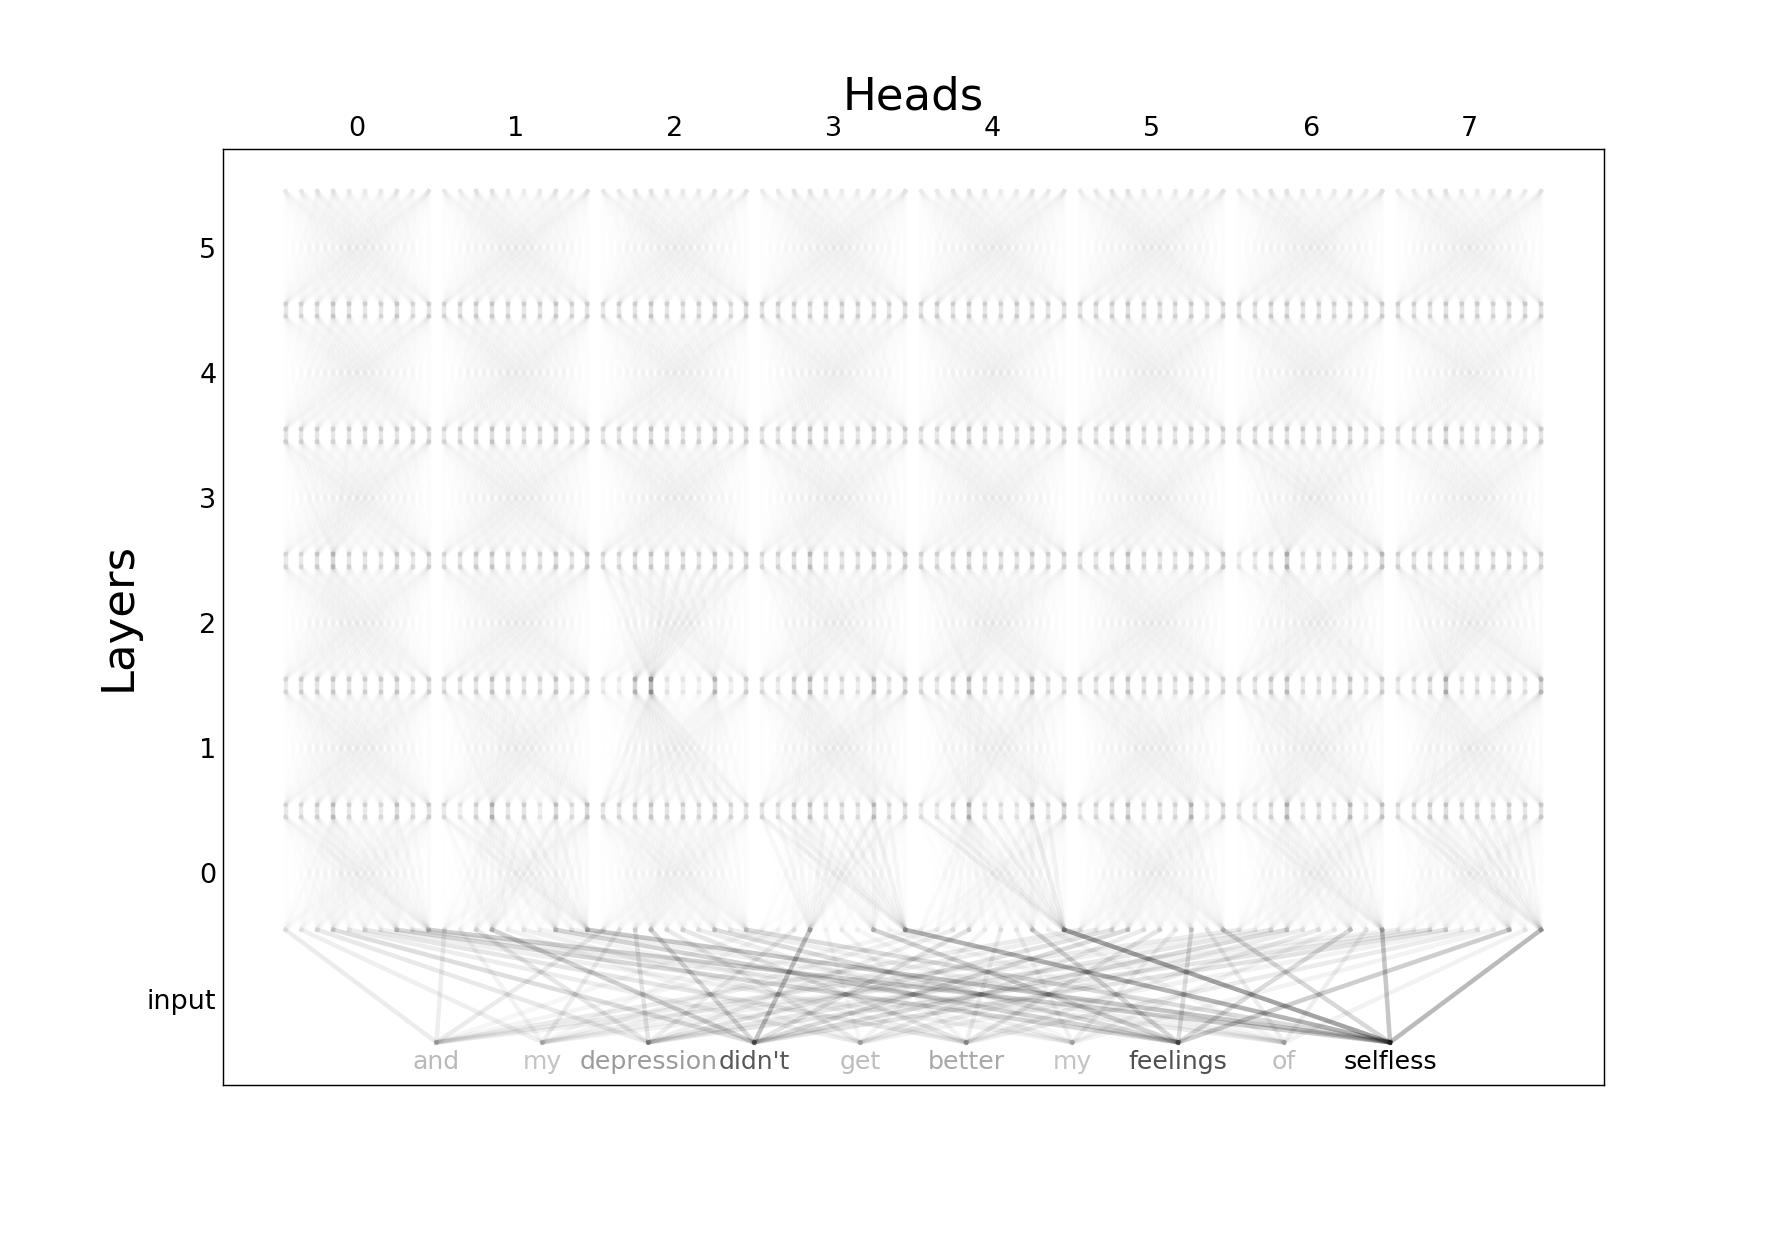

In [83]:
'''
Try in the zoom-in version
'''
%matplotlib notebook
trace_attn_viz_func(tf_attns, ctx_attns, select_sentence, seq_rand, reduce="min_max", view="normal")